In [2]:
import time
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import fbeta_score, make_scorer, confusion_matrix
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import KFold
from sklearn import svm
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.utils import resample
from icecream import ic

In [3]:
# What do I have to do?
# Implement a SVM Kernel classification based on polynomial Kernels and Gaussian Kernels (e.g. radial base function)
# Apply to a dataset of your choice
# Choose two metrices to optimize for like precision, recall, f1 score, f2 score, f0.5 score
# Identify which combo of two parameters optimizes for each score
# Use GridSearch, RandomSearch or other methods like hyperopt (2 parameters is enough)
# Very important comment everything!!


In [37]:
#This cell is reading the data into a dataframe
df = pd.read_csv('../Source/data_banknote_authentication.txt', sep = ',', header = None)

In [38]:
#X is the feature matrix, y is the target variable
X = df.iloc[: , :-1]
y = df.iloc[:, -1]

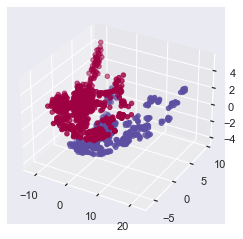

In [54]:
# Plot data here maybe with t-SNE (that would be dope!!)
from time import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import manifold

pca = PCA(n_components=3)
Y = pca.fit_transform(X)

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(Y[:, 0], Y[:, 1], Y[:, 2], c=y, cmap=plt.cm.Spectral)

ax.axis('tight')
plt.show()

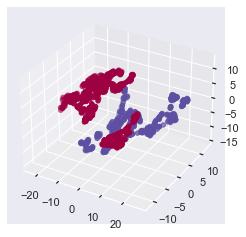

In [56]:
tsne = manifold.TSNE(n_components=3, init='pca', random_state=0)
Y = tsne.fit_transform(X)

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(Y[:, 0], Y[:, 1], Y[:, 2], c=y, cmap=plt.cm.Spectral)

ax.axis('tight')
plt.show()

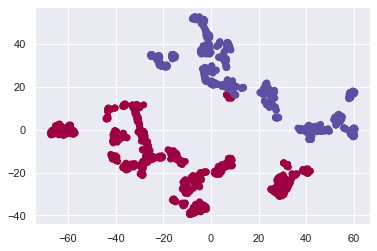

In [59]:
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
Y = tsne.fit_transform(X)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(Y[:, 0], Y[:, 1], c=y, cmap=plt.cm.Spectral)

ax.axis('tight')
plt.show()

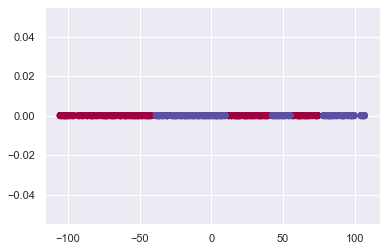

In [61]:
tsne = manifold.TSNE(n_components=1, init='pca', random_state=0)
Y = tsne.fit_transform(X)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(Y[:, 0],np.zeros_like(Y), c=y, cmap=plt.cm.Spectral)

ax.axis('tight')
plt.show()

In [6]:
#Training and test data split + we are normalizing the data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state= 0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [7]:
# fixed: make f2 a valid validation, Recall is more important than precision!
def f2_scorer(y_true, y_pred):
    y_true, y_pred, = np.array(y_true), np.array(y_pred)
    return fbeta_score(y_true, y_pred, beta = 2, pos_label = 0, average = 'binary')

f2 = make_scorer(f2_scorer, greater_is_better=True)

# here for question b: make f05 a valid validation, Precision is more important than recall!
def f05_scorer(y_true, y_pred):
    y_true, y_pred, = np.array(y_true), np.array(y_pred)
    return fbeta_score(y_true, y_pred, beta = 0.5, pos_label = 0, average = 'binary')

f05 = make_scorer(f05_scorer, greater_is_better = True)

#Takeaway for the ECB it is more important to detect all fake bank notes and provide new ones

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass param_name=degree, param_range=[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass param_name=degree, param_range=[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass param_name=C, param_range=[  0.5   1.    2.    3.    4.    5.    6. 

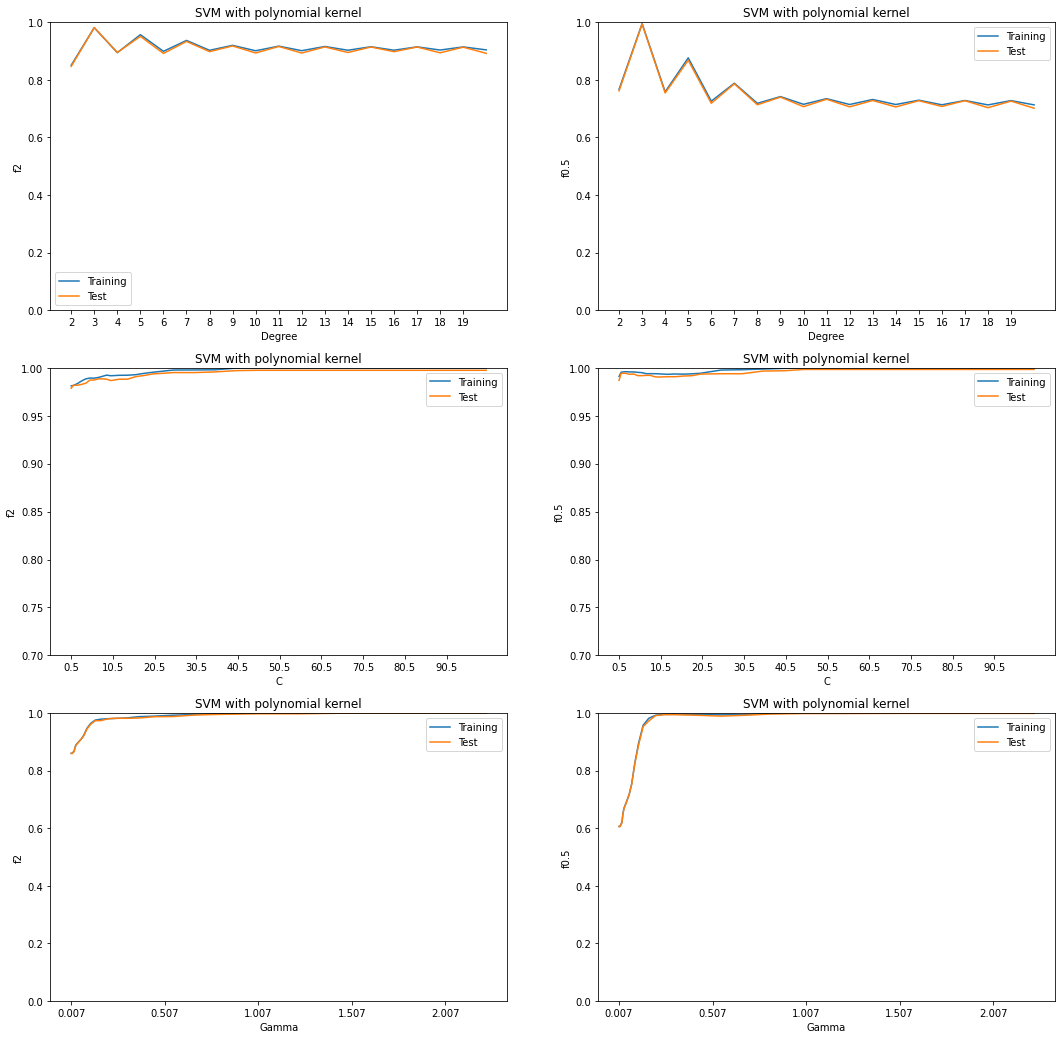

In [8]:
def plot_poly_curve(gammas = 'auto', Cs = 1, degrees = 3, scoring = f2): # by default
    
    num_splits = 5 # use of k-fold is good
    kfold = KFold(n_splits = 5) # ,random_state = 0) 
    
    if type(degrees) == np.ndarray:
        svm_poly = svm.SVC(kernel = 'poly', gamma = gammas, C = Cs) # here C is fixed
        num_values = len(degrees)
        train_scores, valid_scores = validation_curve(svm_poly, X_train, y_train, 
                                                  "degree", degrees, cv=kfold, 
                                                  scoring = scoring)
        xlabel = 'Degree'
        xtick = np.arange(degrees.min(), degrees.max(), 1)
        Xs = degrees
        ylim = [0, 1]
    elif type(Cs) == np.ndarray:
        svm_poly = svm.SVC(kernel = 'poly', gamma = gammas, degree = degrees)
        num_values = len(Cs)
        train_scores, valid_scores = validation_curve(svm_poly, X_train, y_train, 
                                                  "C", Cs, cv=kfold, 
                                                  scoring = scoring)
        xlabel = 'C'
        xtick = np.arange(Cs.min(), Cs.max(), 10)
        Xs = Cs
        ylim = [0.7, 1]
    elif type(gammas) == np.ndarray:
        svm_poly = svm.SVC(kernel = 'poly', degree = degrees, C = Cs)
        num_values = len(gammas)
        train_scores, valid_scores = validation_curve(svm_poly, X_train, y_train, 
                                                  "gamma", gammas, cv=kfold, 
                                                  scoring = scoring)
        xlabel = 'Gamma'
        xtick = np.arange(gammas.min(), gammas.max(), 0.5)
        Xs = gammas
        ylim = [0, 1]
    else:
        raise TypeError

    train_scores_poly = pd.DataFrame(data = train_scores, 
                                        index = np.arange(0, num_values), 
                                        columns = np.arange(0, num_splits)) 
    valid_scores_poly = pd.DataFrame(data = valid_scores, 
                                        index = np.arange(0, num_values), 
                                        columns = np.arange(0, num_splits)) 

    plt.plot(Xs, train_scores_poly.mean(axis=1), label = 'Training')
    plt.plot(Xs, valid_scores_poly.mean(axis=1), label = 'Test')
    plt.xlabel(xlabel)
    if scoring == f2:
        plt.ylabel('f2')
    elif scoring == f05:
        plt.ylabel('f0.5')
    else:
        plt.ylabel('scoring')
    plt.ylim(ylim)
    plt.xticks(xtick)
    plt.title('SVM with polynomial kernel')
    plt.legend()

    
plt.figure(figsize = (18, 18))
degrees = np.arange(2, 21, 1) # choose/scan more systematically 
Cs = np.append(np.array([0.5]), 
               np.append(np.append(np.arange(1, 10, 1), 
                                  
                                   np.arange(10, 20, 2)), 
                         np.arange(20, 101, 5)))
#gammas = np.arange(0.008, 0.051, 0.002)
gammas = np.exp(np.arange(-5, 1, 0.2))

plt.subplot(3, 2, 1)
plot_poly_curve(degrees = degrees)
plt.subplot(3, 2, 2)
plot_poly_curve(degrees = degrees, scoring = f05)
plt.subplot(3, 2, 3)
plot_poly_curve(Cs = Cs)
plt.subplot(3, 2, 4)
plot_poly_curve(Cs = Cs, scoring = f05)
plt.subplot(3, 2, 5)
plot_poly_curve(gammas = gammas)
plt.subplot(3, 2, 6)
plot_poly_curve(gammas = gammas, scoring = f05)

plt.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass param_name=C, param_range=[  0.5   1.    2.    3.    4.    5.    6.    7.    8.    9.   10.   12.
  14.   16.   18.   20.   25.   30.   35.   40.   45.   50.   55.   60.
  65.   70.   75.   80.   85.   90.   95.  100. ] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass param_name=C, param_range=[  0.5   1.    2.    3.    4.    5.    6.    7.    8.    9.   10.   12.
  14.   16.   18.   20.   25.   30.   35.   40.   45.   50.   55.   60.
  65.   70.   75.   80.   85.   90.   95.  100. ] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  wa

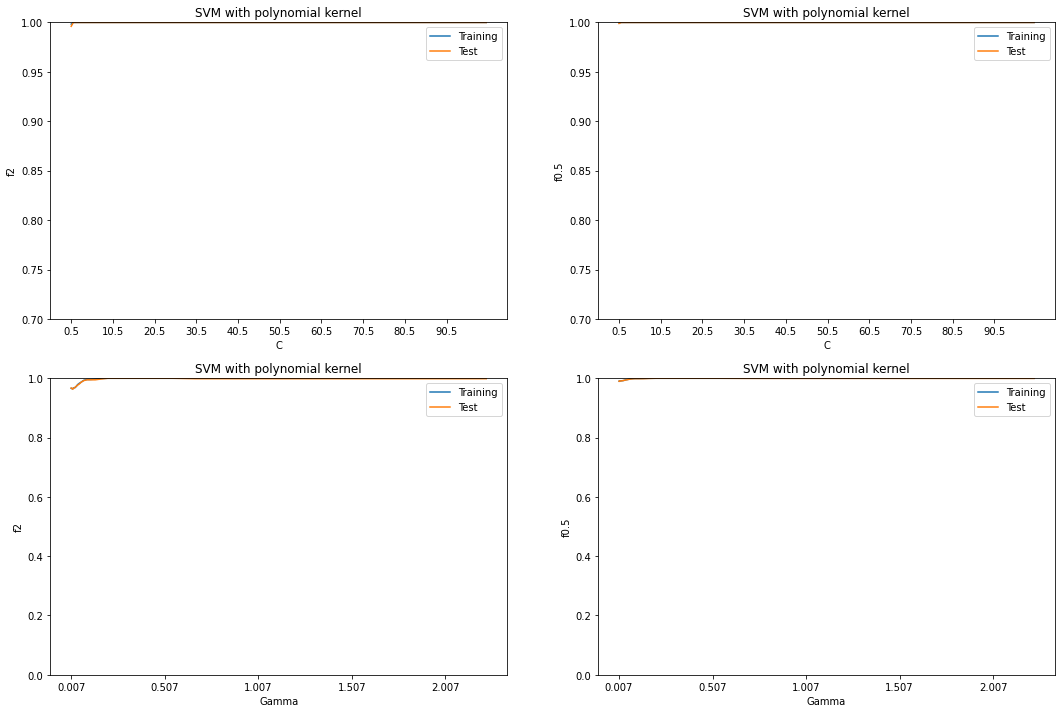

In [9]:
# The two functions can actually be integrated.
def plot_rbf_curve(gammas = 'auto', Cs = 1, scoring = f2): # by default
    
    num_splits = 5 # use of k-fold is good
    kfold = KFold(n_splits = 5) # ,random_state = 0) 
    
    if type(Cs) == np.ndarray:
        svm_poly = svm.SVC(kernel = 'rbf', gamma = gammas)
        num_values = len(Cs)
        train_scores, valid_scores = validation_curve(svm_poly, X_train, y_train, 
                                                  "C", Cs, cv=kfold, 
                                                  scoring = scoring)
        xlabel = 'C'
        xtick = np.arange(Cs.min(), Cs.max(), 10)
        Xs = Cs
        ylim = [0.7, 1]
    elif type(gammas) == np.ndarray:
        svm_poly = svm.SVC(kernel = 'rbf', C = Cs)
        num_values = len(gammas)
        train_scores, valid_scores = validation_curve(svm_poly, X_train, y_train, 
                                                  "gamma", gammas, cv=kfold, 
                                                  scoring = scoring)
        xlabel = 'Gamma'
        xtick = np.arange(gammas.min(), gammas.max(), 0.5)
        Xs = gammas
        ylim = [0, 1]
    else:
        raise TypeError

    train_scores_poly = pd.DataFrame(data = train_scores, 
                                        index = np.arange(0, num_values), 
                                        columns = np.arange(0, num_splits)) 
    valid_scores_poly = pd.DataFrame(data = valid_scores, 
                                        index = np.arange(0, num_values), 
                                        columns = np.arange(0, num_splits)) 

    plt.plot(Xs, train_scores_poly.mean(axis=1), label = 'Training')
    plt.plot(Xs, valid_scores_poly.mean(axis=1), label = 'Test')
    plt.xlabel(xlabel)
    if scoring == f2:
        plt.ylabel('f2')
    elif scoring == f05:
        plt.ylabel('f0.5')
    else:
        plt.ylabel('scoring')
    plt.ylim(ylim)
    plt.xticks(xtick)
    plt.title('SVM with polynomial kernel')
    plt.legend()

    
plt.figure(figsize = (18, 12))

Cs = np.append(np.array([0.5]), 
               np.append(np.append(np.arange(1, 10, 1), 
                                  
                                   np.arange(10, 20, 2)), 
                         np.arange(20, 101, 5)))
#gammas = np.arange(0.008, 0.051, 0.002)
gammas = np.exp(np.arange(-5, 1, 0.2))

plt.subplot(2, 2, 1)
plot_rbf_curve(Cs = Cs)
plt.subplot(2, 2, 2)
plot_rbf_curve(Cs = Cs, scoring = f05)
plt.subplot(2, 2, 3)
plot_rbf_curve(gammas = gammas)
plt.subplot(2, 2, 4)
plot_rbf_curve(gammas = gammas, scoring = f05)

plt.show()

In [24]:
start = time.time()

param_grid = {'kernel' : ['poly', 'rbf'],
              'C' : [5, 10],
              'gamma' : [1/X_train.shape[1], 0.001],
              'degree' : [3]}   # 3 5 7           

scoring = {'Accuracy' : 'accuracy',
           'Precision' : 'precision', 
           'recall' : 'recall',
           'f1' : 'f1', 
           'f2' : f2,
           'f0.5' : f05}

svm_ = svm.SVC() #random_state = 0)
CV_svm = GridSearchCV(estimator = svm_, param_grid = param_grid, cv = 5, 
                      scoring = scoring, refit = 'f2')
CV_svm.fit(X_train, y_train)


time_spend = time.time() - start
print('time spent: ', time_spend)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Fram

In [25]:
# a DataFrame to keep track of the results
params_ = CV_svm.cv_results_['params']
result = {k : [dic[k] for dic in params_] for k in params_[0]}
cln = ['kernel', 'C', 'gamma', 'degree']

for i in ['Accuracy', 'Precision', 'recall', 'f1', 'f2', 'f0.5']:
    result['mean_test_' + i] = CV_svm.cv_results_['mean_test_' + i]
    result['std_test_' + i] = CV_svm.cv_results_['std_test_' + i]
    cln.append('mean_test_' + i)

results = pd.DataFrame(result)
display(results)

,C,degree,gamma,kernel,mean_test_Accuracy,std_test_Accuracy,mean_test_Precision,std_test_Precision,mean_test_recall,std_test_recall,mean_test_f1,std_test_f1,mean_test_f2,std_test_f2,mean_test_f0.5,std_test_f0.5
0,5,3,0.250,poly,0.988157,0.006161,0.980156,0.012403,0.993898,0.004982,0.986933,0.006713,0.985735,0.008448,0.992652,0.003931
1,5,3,0.250,rbf,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
2,5,3,0.001,poly,0.551507,0.001230,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.860108,0.000599,0.605851,0.001188
3,5,3,0.001,rbf,0.975396,0.010224,0.953679,0.020061,0.993939,0.012121,0.973230,0.011103,0.966993,0.014065,0.987786,0.008075
4,10,3,0.250,poly,0.988153,0.006805,0.982076,0.013021,0.991857,0.004072,0.986903,0.007436,0.986737,0.009040,0.991662,0.003991
5,10,3,0.250,rbf,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
6,10,3,0.001,poly,0.551507,0.001230,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.860108,0.000599,0.605851,0.001188
7,10,3,0.001,rbf,0.977219,0.009108,0.955554,0.018521,0.995960,0.008081,0.975221,0.009853,0.968665,0.012974,0.989451,0.005837


In [13]:
start = time.time()

C2 = np.append(np.array([0.5]), 
               np.append(np.append(np.arange(1, 10, 1), 
                                  
                                   np.arange(10, 20, 2)), 
                         np.arange(20, 101, 5)))

param_grid2 = {'C' : C2,
               'gamma' : np.append(np.arange(0.008, 0.051, 0.002), 1/X_train.shape[1])}   

svm_2 = svm.SVC(kernel = 'rbf', random_state = 0)
CV_svm2 = GridSearchCV(estimator = svm_2, param_grid = param_grid2, cv = 5, 
                       scoring = scoring, refit = 'f2')
CV_svm2.fit(X_train, y_train)

time_spend = time.time() - start
print('time spent: ', time_spend)

time spent:  25.5033061504364


In [14]:
# a DataFrame to keep track of the results
params_2 = CV_svm2.cv_results_['params']
result2 = {k : [dic[k] for dic in params_2] for k in params_2[0]}

for i in ['Accuracy', 'Precision', 'recall', 'f1', 'f2', 'f0.5']:
    result2['mean_test_' + i] = CV_svm2.cv_results_['mean_test_' + i]
    result2['std_test_' + i] = CV_svm2.cv_results_['std_test_' + i]

results2 = pd.DataFrame(result2)
results2.loc[:, 'kernel'] = 'rbf'
results_all = results.append(results2, ignore_index = True)

In [15]:
#Sort all results
results_all_sorted2 = results_all.sort_values('mean_test_f2', ascending = False)
results_all_sorted2.index = range(len(results_all_sorted2))
results_all_sorted05 = results_all.sort_values('mean_test_f0.5', ascending = False)
results_all_sorted05.index = range(len(results_all_sorted05))

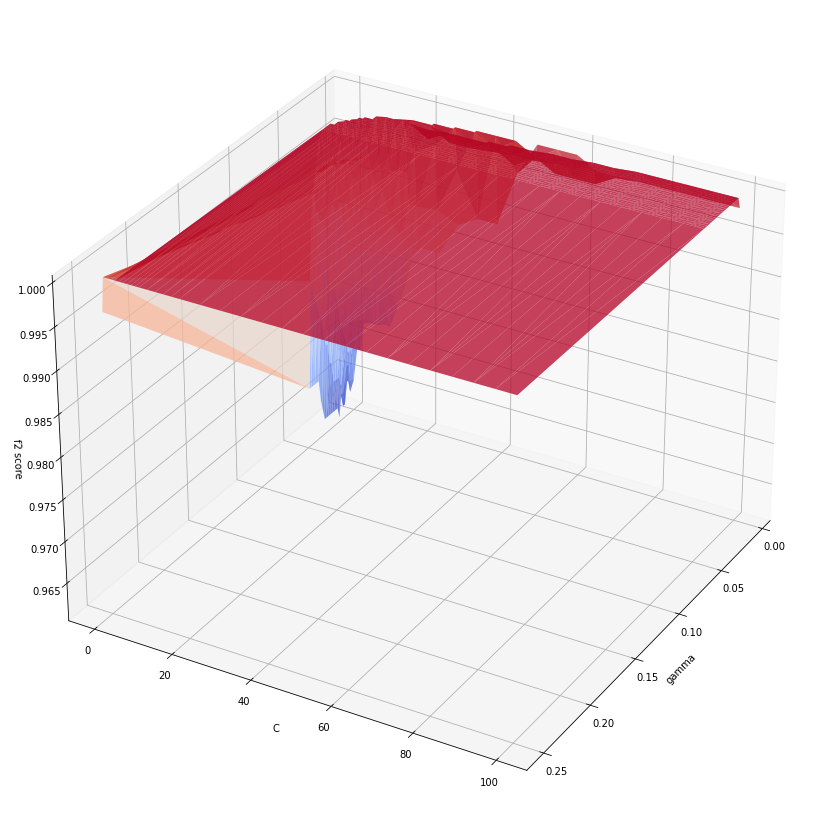

In [16]:
# Plot the surface for f2 score
plt.figure(figsize = (15, 15))
ax = plt.axes(projection='3d')
ax.plot_trisurf(results2.gamma, results2.C, results2.mean_test_f2, 
                cmap = matplotlib.cm.coolwarm, alpha = 0.75)
ax.set_xlabel('gamma')
ax.set_ylabel('C')
ax.set_zlabel('f2 score')
ax.view_init(azim=30)    # rotation
plt.show()

In [17]:
# We use the best one for f2:
print(results_all_sorted2.loc[0, ['C', 'gamma', 'kernel']])
svm_bestf2 = svm.SVC(C = results_all_sorted2.loc[0, 'C'], 
                     gamma = results_all_sorted2.loc[0, 'gamma'],
                     kernel = results_all_sorted2.loc[0, 'kernel'])
                     #random_state = 0)
svm_bestf2.fit(X_train, y_train)

y_train_pred = svm_bestf2.predict(X_train)
y_test_pred = svm_bestf2.predict(X_test)

conf_mat_train = confusion_matrix(y_train, y_train_pred)
conf_mat_test = confusion_matrix(y_test, y_test_pred)

f2_train = f2_scorer(y_train, y_train_pred)
f2_test = f2_scorer(y_test, y_test_pred)

print('Confusion matrix of training sample: \n', conf_mat_train)
print('Confusion matrix of test sample: \n', conf_mat_test)
print('f2 score of training sample: ', f2_train)
print('f2 score of test sample: ', f2_test)

C         20.0
gamma     0.05
kernel     rbf
Name: 0, dtype: object
Confusion matrix of training sample: 
 [[605   0]
 [  0 492]]
Confusion matrix of test sample: 
 [[157   0]
 [  0 118]]
f2 score of training sample:  1.0
f2 score of test sample:  1.0


## Takeaway
### C: if you increase the C parameter, you’re betting that the training data contains the most extreme possible observations